## 18. 일반화 기법


### import

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

for i in [pd, np, sklearn, mpl, sns]:
    print(i.__name__, i.__version__)

C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
matplotlib 3.5.3
seaborn 0.12.2


C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### 예제 데이터셋 준비

In [2]:
df_credit = pd.read_pickle('data/credit.pkl')

df_credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359375,-0.072754,2.537109,1.377930,-0.338379,0.462402,0.239624,0.098694,0.363770,...,-0.018311,0.277832,-0.110474,0.066956,0.128540,-0.189087,0.133545,-0.021057,149.625000,0
1,0,1.191406,0.266113,0.166504,0.448242,0.060028,-0.082336,-0.078796,0.085083,-0.255371,...,-0.225830,-0.638672,0.101318,-0.339844,0.167114,0.125854,-0.008980,0.014725,2.689453,0
2,1,-1.358398,-1.339844,1.773438,0.379883,-0.503418,1.800781,0.791504,0.247681,-1.514648,...,0.248047,0.771484,0.909180,-0.689453,-0.327637,-0.139038,-0.055359,-0.059753,378.750000,0
3,1,-0.966309,-0.185181,1.792969,-0.863281,-0.010307,1.247070,0.237549,0.377441,-1.386719,...,-0.108276,0.005272,-0.190308,-1.175781,0.647461,-0.221924,0.062744,0.061462,123.500000,0
4,2,-1.158203,0.877930,1.548828,0.403076,-0.407227,0.095947,0.592773,-0.270508,0.817871,...,-0.009430,0.798340,-0.137451,0.141235,-0.206055,0.502441,0.219482,0.215210,70.000000,0


In [3]:
df_berry = pd.read_csv("data/wild_blueberry.csv", index_col='Row#')
df_berry.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
Row#,,,,,,,,,,,,,,,,,
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names).assign(
    species = pd.Categorical.from_codes(iris.target, iris.target_names)
)
df_iris.head()

C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1. 일반화 기법
#### 하이퍼 파라미터 최적화(Hyper-Parameter Optimization)
- 최적의 일반화 성능을 지닌 하이퍼 파라미터의 조합을 탐색
#### 속성 선택(Feature Selection)
- 불필요한 특성 제거
#### 클래스 불균형 대응
- 특정 클래스의 치우침 해소를 통한 지표 향상

### 2. 하이퍼 파라미터 탐색
#### 그리드 서치 (Grid Search)
- 주어진 하이퍼 파라미터 리스트에서 조합 가능한 경우의 수를 구함

> max_depth={3, 5, 10},  n_estimator={100, 200}
> 
> $\Rightarrow$ {(3, 100),(5, 100),(10, 100), (3, 200),(5, 200),(10, 200)}
- 모든 하이퍼 파라미터 조합으로 검증을 수행 하고, 최적의 성능을 보인 모델 선택

**[Ex.1]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_berry 에서 yield를 예측하는 K-최근접 이웃모델의 근접이웃 수에 따른 분산의 변화를 살펴봅니다.
    
전체 데이터를 80% 학습 데이터 df_train, 20%는 평가 데이터 df_test로 나눕니다.
    
Random Forest Regressor 기본 파라미터 설정과 모든 입력 변수를 사용했을 때를 비교합니다.
    
df_train에서 다음 Random Forest Regressor 하이퍼 파라메터 설정에서 최적의 성능을 보이는 조합을 

Grid Search로 탐색합니다.

```
n_estimators: [30, 50, 70]
max_depth: [7, 8, 9]
min_samples_leaf: [4, 8]
```

검증 방법: 5겹 교차검증(5 fold cross validation)

성능 지표: 평균절대오차(MAE, Mean Absolute Error)
    
</div>

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
df_train, df_test = train_test_split(df_berry, train_size=0.8, random_state=123)
X_cols = [i for i in df_berry.columns if i != 'yield']

In [6]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor(random_state=123)
reg_rf.fit(df_train[X_cols], df_train['yield'])

c:\users\user\python3.7\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [7]:
mean_absolute_error(df_test['yield'], reg_rf.predict(df_test[X_cols]))

132.12728549358965

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

grcv = GridSearchCV(
    estimator = RandomForestRegressor(random_state=123), # 대상 모델의 인스턴스를 생성하여 전달합니다.
    param_grid = {
        'n_estimators': [50, 70, 100],
        'max_depth': [9, 10, 11],
        'min_samples_leaf': [2, 4]
    }, # 대상 하이퍼파라메터를 정의 합니다. key: 하이퍼파라메터명, values: 탐색 후보 리스트
    scoring='neg_mean_absolute_error', # 성능 평가 기준입니다. 
    cv = KFold(n_splits=5, random_state=123, shuffle=True) # 검증 방법 5겹 교차 검증에 따른 Splitter를 전달합니다.
)
grcv.fit(df_train[X_cols], df_train['yield'])
grcv.best_params_, grcv.best_score_

({'max_depth': 11, 'min_samples_leaf': 2, 'n_estimators': 70},
 -118.71436327631734)

In [9]:
reg_rf = RandomForestRegressor(**grcv.best_params_, random_state=123)
reg_rf.fit(df_train[X_cols], df_train['yield'])
mean_absolute_error(df_test['yield'], reg_rf.predict(df_test[X_cols]))

124.67099621458922

#### 랜덤 서치(Random Search)

- 주어진 하이퍼 파라미터 리스트에서 조합 가능한 경우의 수를 구함

> max_depth={3, 5, 10},  n_estimator={100, 200}
> 
> $\Rightarrow$ {(3, 100),(5, 100),(10, 100), (3, 200),(5, 200),(10, 200)}

- 모든 하이퍼 파라미터 조합 중에서 지정한 횟수만큼 선택하여 검증을 수행 하고 최적의 모델 선택

**[Ex.2]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_berry 에서 yield를 예측하는 K-최근접 이웃모델의 근접이웃 수에 따른 분산의 변화를 살펴봅니다.
    
전체 데이터를 80% 학습 데이터 df_train, 20%는 평가 데이터 df_test로 나눕니다.
    
Random Forest Regressor 기본 파라미터 설정과 모든 입력 변수를 사용했을 때를 비교합니다.
    
df_train에서 다음 Random Forest Regressor 하이퍼 파라메터 설정에서 최적의 성능을 보이는 조합을 

총 30회 탐색을 설정하여 랜덤서치로 구합니다.

```
n_estimators: [30, 50, 70]
max_depth ~ pois(10),
min_samples_leaf: [4, 8]
```

검증 방법: 5겹 교차검증(5 fold cross validation)

성능 지표: 평균절대오차(MAE, Mean Absolute Error)
    
</div>

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import poisson
grcv = RandomizedSearchCV(
    estimator = RandomForestRegressor(random_state=123), # 대상 모델의 인스턴스를 생성하여 전달합니다.
    param_distributions = {
        'n_estimators': [50, 70, 100],
        'max_depth': poisson(10),
        'min_samples_leaf': [2, 4]
    }, # 대상 하이퍼파라메터를 정의 합니다. key: 하이퍼파라메터명, values: 탐색 후보 리스트
    n_iter = 30,
    scoring='neg_mean_absolute_error', # 성능 평가 기준입니다. 
    cv = KFold(n_splits=5, random_state=123, shuffle=True) # 검증 방법 5겹 교차 검증에 따른 Splitter를 전달합니다.
)
grcv.fit(df_train[X_cols], df_train['yield'])
grcv.best_params_, grcv.best_score_

({'max_depth': 12, 'min_samples_leaf': 2, 'n_estimators': 70},
 -118.75502450983252)

In [11]:
reg_rf = RandomForestRegressor(**grcv.best_params_, random_state=123)
reg_rf.fit(df_train[X_cols], df_train['yield'])
mean_absolute_error(df_test['yield'], reg_rf.predict(df_test[X_cols]))

124.46007843093064

#### 그리드 서치 vs 랜덤 서치

|   | 그리드 서치<br/>(Grid Search) | 랜덤 서치<br/>(Random Search) |
| --- | --- | --- |
| 탐색 방식 | 전수조사 | 무작위 선택 조사 |
| 탐색 횟수 | 조합 수 | 시도 횟수 |
| 최적화 정확도 | 주어진 조합에서 가장 좋은 조합 보장 | 가장 좋은 조합 보장 불가<br/>조합의 수가 많아질수록, 시도 횟수가 적을수록 최적의 조합을 발견할 확률 감소 |
| 연산량 | 탐색 범위가 늘어날수록 폭발적으로 증가 | 시도 횟수에 비례 |


### 3. 속성 선택
#### Filter 방식: 각 속성과 타깃 간의 관계성을 측정
- 각종 통계량 활용: 정보 이득(Information Gain), VIF(Variance Inflation factor)...
- 가설 검정의 p-value 나 통계량 활용

| 변수 |   | 구분 | 분석 방법 |
| --- | --- | --- | --- |
| 수치형 | 이진 범주형 | 모수적 | t –검정 |
|   |   | 비모수적 | Mann-Whitney U |
| 수치형 | 수치형 | 모수적 | Pearson 상관도 |
|   |   | 비모수적 | Spearman 상관도 |
| 수치형 | 범주형 | 모수적 | 일원 분산분석 |
|   |   | 비모수적 | Kruskal-Wallis |
| 범주형 | 범주형 | 비모수적 | 카이제곱 독립성 검정 |


**[Ex.3]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

[Ex 1]에서 제작한 입력 변수를 정규화 처리한 데이터인 X_train과 
    
대상 데이터인 y_train의 피어슨 상관도를 기준으로 상관도가 높은 입력 변수(속성)을 우선으로 
    
5개에서 16개까지 선택하여 성능을 측정했을 때, 

가장 좋은 성능을 보일 때의 선택한 입력 변수의 수를 구해 봅니다.

max_depth: 11, min_samples_leaf: 2, n_estimators: 70 의 Random Forest Regressor를 사용합니다
    
검증 방법: 5겹 교차 검증(5-fold cross validation)

성능 측정 지표: 평균절대오차(MAE, Mean Absolute Error)
    
</div>

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score

def get_corr(X, y):
    """
    입력 변수 X와, 대상 변수 y 간 피어슨 상관도와 pvalue를 환합니다.
    Parameters:
        X: 입력 변수
        y: 대상 변수
    Returns:
        scores(pearson correlation), pvalues
    """
    scores, pvalues = list(), list() 
    for i in range(X.shape[1]):
        r = pearsonr(X[:, i], y)
        scores.append(abs(r[0]))
        pvalues.append(r[1])
    return scores, pvalues

cv = KFold(n_splits=5, random_state=123, shuffle=True)
cv_scores = list()
for i in range(5, 17):
    reg_rf_kbest = make_pipeline(
        SelectKBest(get_corr, k=i),
        RandomForestRegressor(max_depth=11, min_samples_leaf=2, n_estimators=70)
    )
    cv_scores.append(
        -np.mean(cross_val_score(reg_rf_kbest, df_train[X_cols], df_train['yield'], cv=cv, scoring='neg_mean_absolute_error'))
    )

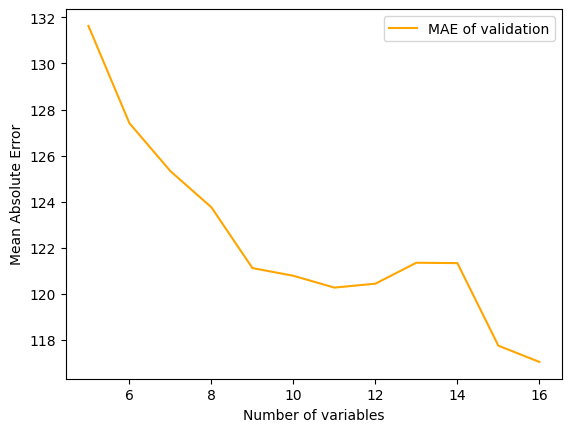

In [13]:
plt.plot(np.arange(5, 17), cv_scores, label = 'MAE of validation', color='orange')
plt.gca().set_xlabel('Number of variables')
plt.gca().set_ylabel('Mean Absolute Error')
plt.legend()
plt.show()

#### Wrapper 방식: 속성 부분 집합에 대한 Wrapper 모델의 검증 성능 기준
- 완전 탐색(Exhaustive Search): 가능한 모든 조합의 속성을 탐색
- 순차적 선택법: 단계별 속성을 하나씩 추가 또는 제거

| 방식 | 수행 |
| --- | --- |
| 전진 선택법<br/>Forward Selection | 매 단계마다 선택되지 않은 속성 중에서, 추가 시 성능 향상이 큰 속성 추가 |
| 후진 제거법<br/>Backward Elimination | 매 단계마다 선택된 속성 중에서, 제거 시 성능 향상이 큰 속성 제거<br/>※ 선형 회귀 모델 사용 시, 속성의 수가 표본 수보다 많을 경우 사용 불가 |
| 단계적 선택<br/>Stepwise Selection | 추가와 제거를 모두 수행, 동일 과정이 반복되지 않게 유의<br/>- 전진 선택 시, 각 단계에서 속성 제거 시도: 개선 시 제거 → 단계적 전진 선택법<br/>- 후진 제거 시, 각 단계에서 속성 추가 시도: 개선 시 추가 → 단계적 후진 제거법 |

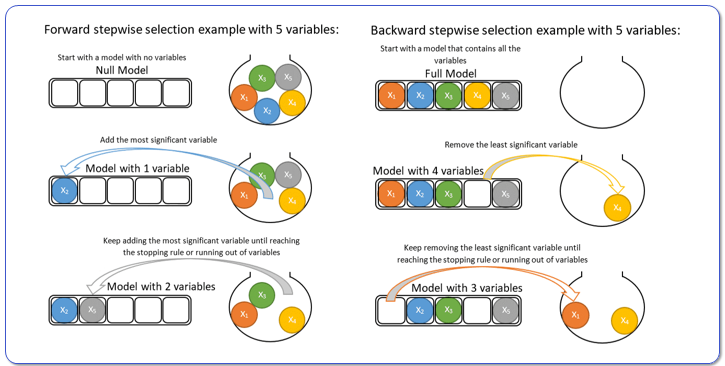

#### Wrapper 방식

- 재귀적 제거법(Recursive Feature Elimination)
> 모델 학습 결과에서 보인 속성별 중요도를 나타내는 지표를 기준으로 각 단계에서 가장 중요도가 낮은 속성을 하나씩 제거


1. $X = \{\mathbf{x}_1, \mathbf{x}_2, ... \mathbf{x}_k\}$

2. X를 사용하여 모델 학습

3. 모델의 학습 결과에서 각 속성별 중요도 측정

4. 중요도가 낮은 속성 제거

5. 종료 조건을 충족할 때까지, 2부터 반복

Ex) 의사 결정 나무의 속성 중요도, 선형 회귀 모델 계수의 절대값, ...

**[Ex.4]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

80%는 학습데이터 df_train으로, 20%는 평가데이터 df_test로 게층적 분리법으로 나눕니다.
    
학습데이터의 입력 변수를 모두 표준 정규화하고, 학습데이터의 설정으로 평가데이터까지 표준정규화합니다.
    
전진선택법, 단계적 전진선택법, 후진제거법, 단계적후진제거법을 수행해봅니다.
    
</div>

In [14]:
df_train, df_test = train_test_split(df_iris, train_size = 0.8, stratify = df_iris['species'])

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from itertools import combinations

def eval_subsets(subsets):
    """
    변수셋의 성능을 평가합니다.
    Parameters:
        subsets: list
            입력 변수 리스트
    Returns
        accuracy
    """
    return np.mean(
        cross_val_score(clf_lr, df_train[subsets], df_train['species'], scoring='accuracy', cv=cv)
    )
def forward_select(X_all, X_subsets):
    """
    전진 선택 연산
    Parameters:
        X_all: list
            모든 입력 변수 리스트
        X_subsets: list
            선택된 입력 변수 리스트
    Returns
        str, float
        선택된 변수명, 성능
    """
    X_fwd = [X_subsets + [i] for i in X_all if i not in X_subsets]
    scores_fwd = list()
    for i in X_fwd:
        scores_fwd.append(eval_subsets(i))
    idx = np.argmax(scores_fwd)
    return X_fwd[idx], scores_fwd[idx]

def backward_eliminate(X_subsets):
    """
    후진 제거 연산
    Parameters:
        X_subsets: list
            선택된 입력 변수 리스트
    Returns
        str, float
        선택된 변수명, 성능
    """
    if len(X_subsets) < 2:
        return [], -np.inf
    scores_bwd = list()
    X_bwd = [list(i) for i in combinations(X_subsets, len(X_subsets) - 1)]
    for i in X_bwd:
        scores_bwd.append(eval_subsets(i))
    idx = np.argmax(scores_bwd)
    return X_bwd[idx], scores_bwd[idx]

clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial'))
X_lr = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

In [16]:
# 전진선택법을 해봅니다.
X_subsets = [[]] # 각 단계에 선택된 속성들을 남기기 위한 리스트 입니다.
scores = [-np.inf]
X_all = np.arange(0, 4)

while True:
    X_best, score = forward_select(X_lr, X_subsets[-1])
    print(X_best, score) # 현 단계에서 가장 좋은 속성 조합을 출력합니다.
    if score <= scores[-1]: # 성능에 개선이 없으면 종료합니다.
        break
    scores.append(score)
    X_subsets.append(X_best)
    if len(X_best) == len(X_all): # 모두 선택되어 더 이상 선택할 변수가 없을 경우 종료합니다.
        break
     
scores[-1], X_subsets[-1]

['petal width (cm)'] 0.9666666666666666
['petal width (cm)', 'sepal length (cm)'] 0.9583333333333333


(0.9666666666666666, ['petal width (cm)'])

In [17]:
# 후진제거법을 해봅니다.
X_subsets = [X_lr]
scores = [eval_subsets(X_lr)]

while True:
    X_best, score = backward_eliminate(X_subsets[-1])
    print(X_best, score)
    if score <= scores[-1]:
        break
    scores.append(score)
    X_subsets.append(X_best)
    if len(X_best) == 1: # 더 이상 제외할 변수가 없으면 종료합니다.
        break
scores[-1], X_subsets[-1]

['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'] 0.9583333333333333
['sepal length (cm)', 'petal width (cm)'] 0.9583333333333333


(0.9583333333333333,
 ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'])

In [18]:
# 단계적 전진선택법
X_subsets = [[]]
scores = [-np.inf]
X_all = np.arange(0, 4)

while True:
    clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial'))
    X_best, score = forward_select(X_lr, X_subsets[-1])
    print(X_best, score)
    
    # 성능에 개선이 없다면 종료 시킵니다.
    if score <= scores[-1]:
        break
    
    X_bwd, bwd_score = backward_eliminate(X_best) # 후진 제거를 합니다.
    if score < bwd_score: # 후진 제거의 효과가 있다면 제거한 리스트를 선택합니다.
        X_best = X_bwd
        score = bwd_score
        print("B.E.: {} {}".format(bwd_score, X_bwd))
    
    scores.append(score)
    X_subsets.append(X_best)
    if len(X_best) == len(X_all):
        break
        
scores[-1], X_subsets[-1]

['petal width (cm)'] 0.9666666666666666
['petal width (cm)', 'sepal length (cm)'] 0.9583333333333333


(0.9666666666666666, ['petal width (cm)'])

In [20]:
# 단계적 후진제거법
X_subsets = [X_lr]
scores = [eval_subsets(X_lr)]

while True:
    X_best, score = backward_eliminate(X_subsets[-1])
    print(X_best, score)
    
    # 성능에 개선이 없다면 종료 시킵니다.
    if score <= scores[-1]:
        break
    
    X_fwd, fwd_score = forward_select(X_lr, X_best)
    if score < fwd_score: # 전진 선택의 효과가 있다면 전진 선택한 리스트를 선택합니다.
        X_best = X_fwd
        score = fwd_score
        print("F.S.: {} {}".format(fwd_score, X_fwd))
    
    scores.append(score)
    X_subsets.append(X_best)
    if len(scores) == len(X_all) + 1:
        break
scores[-1], X_subsets[-1]

['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'] 0.9583333333333333
['sepal length (cm)', 'petal width (cm)'] 0.9583333333333333


(0.9583333333333333,
 ['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'])

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector

# 단계적 전진선택법을 수행하도록 SequentialFeatureSelector를 설정합니다.
sfs = SequentialFeatureSelector(
    make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs', multi_class='multinomial')), # 기반 모델을 설정해줍니다.
    k_features='best',
    forward=True,
    floating=True,
    scoring='accuracy',
    cv=cv
)
sfs.fit(df_train[X_lr].values, df_train['species'])
sfs.k_feature_names_, sfs.k_score_

(('3',), 0.9666666666666666)

#### 임베디드 방식(Embedded Feature Selection): 학습 과정에서 속성이 선택됨
- Lasso 모델: L1 규제에 의해 계수가 0 이 되어 속성의 영향력 손실
- 의사 결정 나무: 분기 선택 과정에 의해 선택

#### 속성 선택
- 정리

|   | Filter 방식 | Wrapper 방식 | Embedded 방식 |
| --- | --- | --- | --- |
| 기준 | 통계적 척도 | 모델 성능 | 모델 학습 과정 |
| 장점 | 빠르고 단순 | 실제 성능을 기준으로 최적화 | 성능 반영 + 효율성 |
| 단점 | 속성의 상호작용 무시<br/>성능과 괴리가 있을 여지가 있음 | 계산량이 큼 | 모델 의존적 |


**[Ex.5]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">
    
df_berry 에서 yield를 예측하는데 있어 유의미한 속성을 Lasso 모델을 사용하여 파악하고자 합니다.
    
전체 데이터를 80% 학습 데이터 df_train, 20%는 평가 데이터 df_test로 나눕니다.

이 과정에서 모든 입력 변수는 학습 데이터에서 필요한 통계량을 구하여, 
    
학습 데이터와 평가 데이터 각각을 표준화 처리합니다.

학습 데이터에서 Lasso 회귀 모델에 의해 선택된 변수를을 파악해봅니다.

$(1 / (2 × n)) × ||y - Xw||^2_2 + alpha × ||w||_1$ , n: 표본의 수

Lasso 모델의 손실 함수를 위와 같이 정의 할 때, 

규제 계수 alpha의 값을 1로 설정하여 진행합니다.

찾은 변수 조합으로 평가 데이터의 성능을 측정 합니다.
    
성능 지표는 (MSE, Mean Squared Error)를 사용합니다.
</div>

In [22]:
from sklearn.linear_model import Lasso
# 여기서는 pipeline을 사용하여 표준화 처리를 Lasso 모델에 연결시켜 표준화 전처리까지 포함된 모델을 구성합니다.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg_lss = make_pipeline(
    StandardScaler(), Lasso(alpha = 1)
)
df_train, df_test = train_test_split(df_berry, train_size = 0.8, random_state = 123)
X_cols = [i for i in df_berry.columns if i != 'yield']
reg_lss.fit(df_train[X_cols], df_train['yield'])
s_coef = pd.Series(reg_lss[1].coef_, index = X_cols, name = 'coef.')
s_coef.to_frame().T

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
coef.,-81.964713,72.805012,29.139234,55.477935,98.464809,-69.55036,-0.0,-52.93726,-1.136931,-0.0,-0.0,-0.0,-179.683842,566.760512,-307.560302,875.366532


In [23]:
# 회귀 계수가 0인 건은 결과에 아무런 영향을 미치치 못하는, 즉 Lasso 학습에 의해 제외된 변수 입니다.
s_coef.loc[s_coef == 0].index

Index(['MinOfUpperTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays'],
      dtype='object')

In [24]:
# 평균제곱오차를 구합니다.
from sklearn.metrics import mean_squared_error
mean_squared_error(
    df_test['yield'], reg_lss.predict(df_test[X_cols])
)

12778.651135682483

In [25]:
# Linear Regression과 비교를 해봅니다,
from sklearn.linear_model import LinearRegression

reg_lr = make_pipeline(
    StandardScaler(), LinearRegression()
)
reg_lr.fit(df_train[X_cols], df_train['yield'])
mean_squared_error(
    df_test['yield'], reg_lr.predict(df_test[X_cols])
)

12303.834623534605

### 4. 클래스 불균형 대응

#### 클래스 불균형에 민감한 지표: 소수 클래스의 구분력에 따라 성능의 편차가 큼

- f1 score

$\text{f1 score}=\frac{2𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛×𝑅𝑒𝑐𝑎𝑙𝑙}{𝑃𝑟𝑒𝑐𝑖𝑠𝑖𝑜𝑛+𝑅𝑒𝑐𝑎𝑙𝑙}$

- 매크로 Recall

$\text{𝑀𝑎𝑐𝑟𝑜 𝑅𝑒𝑐𝑎𝑙𝑙}=\frac{1}{𝐾}\sum_{𝑖=1}^𝐾\frac{𝑇𝑃_𝑖}{𝑇𝑃_𝑖+𝐹𝑁_𝑖}$

$TP_i$: 클래스 i 에 대한 True Positive

$FP_i$: 클래스 i 에 대한 False Positive

$FN_i$: 클래스 i 에 대한 False Negative


#### 클래스 가중치
- 모델 학습 단계에서 소수 클래스의 가중치를 높임
- 높아진 가중치에 의해 소수 클래스가 더 판별이 되도록 학습


**[Ex.6]**

<div style="border: 1px solid #ddd; padding: 12px; margin-top: 10px;">

df_fraud 데이터셋의 타겟 변수인 Class의 비율을 동일하게 하여,

80%는 학습데이터 df_train으로, 20%는 평가데이터 df_test로 나눕니다.

Class가 1인 경우가 양성(Positive)이고 0이 음성(Negative) 입니다.
    

학습 데이터 df_train에서 대상 변수 Class를 제외한 모든 변수를 입력 변수로 설정합니다. 

df_train으로 로지스틱 회귀 모델을 클래스 가중치를 다음과 같이 바꾸어 가면서 학습합니다. 

음의 클래스의 가중치를 1로 고정하고, 양의 클래스의 가중치를 1에서 10까지 0.5씩 증가시켜가면서 

학습을 시키고 f1 score를 측정합니다. 

가장 좋은 f1 score를 보인 경우를 확인해봅니다. 

가중치별 학습데이터의 성능과 평가데이터의 성능 추이를 확인해봅니다.

</div>

In [26]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_credit, train_size=0.8, random_state=123, stratify=df_credit['Class'])

df_train['Class'].value_counts(normalize=True)

0    0.998271
1    0.001729
Name: Class, dtype: float64

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

f1_train_weight, f1_test_weight = list(), list()
X_cols = [i for i in df_train.columns if i !='Class']
weights = np.arange(1, 10.5, 0.5)
f1_scores = list()
    
for i in weights:
    clf_lr = make_pipeline(
        StandardScaler(), 
        LogisticRegression(solver='lbfgs', class_weight={0: 1.0, 1: i})
    )
    clf_lr.fit(df_train[X_cols], df_train['Class'])
    prd = clf_lr.predict(df_train[X_cols].values)
    f1_train_weight.append(f1_score(df_train['Class'], prd))
    prd = clf_lr.predict(df_test[X_cols].values)
    f1_test_weight.append(f1_score(df_test['Class'], prd))

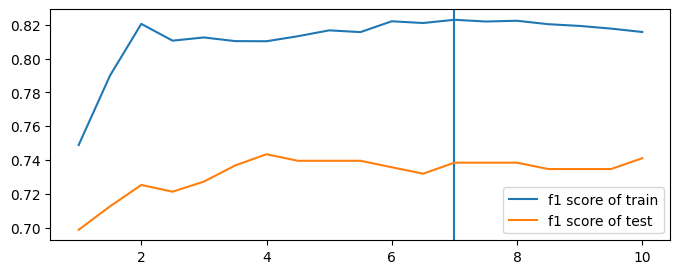

In [28]:
plt.figure(figsize=(8, 3))
plt.plot(weights, f1_train_weight, label='f1 score of train')
plt.axvline(weights[np.argmax(f1_train_weight)])
plt.plot(weights, f1_test_weight, label='f1 score of test')
plt.legend()
plt.show()

In [29]:
f1_test_weight[np.argmax(f1_train_weight)]

0.7384615384615386

#### 클래스 분류 임계점 조정
- 클래스 분류 임계점 조정을 통해 소스 클래스에 균형 부여
- 높아진 가중치에 의해 소수 클래스에 균형 부여

**[Ex.7]**

학습 데이터 df_train에서 대상 변수 Class를 제외한 모든 변수를 입력 변수로 설정합니다. 

df_train으로 로지스틱 회귀 모델을 학습시킵니다. 

양성으로 분류를 다음과 같이 정합니다.

> $P(Class = True) > \alpha$, $P(Class = True)$는 양성으로 예측한 확률입니다.

df_train의 각 데이터의 양성일 확률 구하고, $\alpha$를 0.01 에서 0.99 까지의 0.01 간격으로 성능을 측정해봅니다.

가장 좋은 f1 score를 보인 $\alpha$를 찾습니다.

df_test의 예측 확률을 구해 이 $\alpha$로 양성 클래스를 분류하여 f1 score르 측정해봅니다.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

f1_train_tomek, f1_test_tomek = list(), list()
acc_train, acc_test = list(), list()
X_cols = [i for i in df_train.columns if i !='Class']
clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
clf_lr.fit(df_train[X_cols], df_train['Class'])

prob = clf_lr.predict_proba(df_train[X_cols])[:, 1]

In [31]:
thresholds = np.linspace(0.01, 0.99, 101)
f1_scores = [f1_score(df_train['Class'], prob >= threshold )for threshold in thresholds]
idx_max = np.argmax(f1_scores)
f1_scores[idx_max], thresholds[idx_max]

(0.80970625798212, 0.11779999999999999)

In [32]:
prob_test = clf_lr.predict_proba(df_test[X_cols])[:, 1]
f1_score(df_test['Class'], prob_test >= thresholds[idx_max])

0.7434554973821991

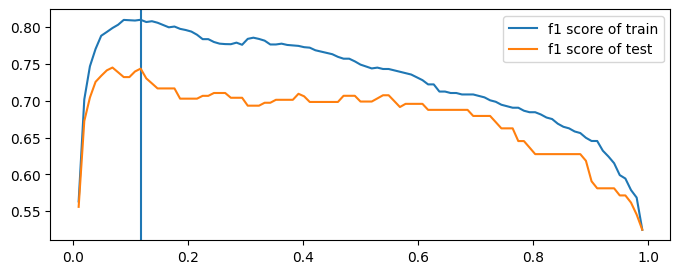

In [33]:
plt.figure(figsize=(8, 3))
plt.plot(thresholds, f1_scores, label='f1 score of train')
plt.axvline(thresholds[idx_max])
plt.plot(thresholds, [f1_score(df_test['Class'], prob_test >= threshold) for threshold in thresholds], label='f1 score of test')
plt.legend()
plt.show()

#### Over Sampling 과 Under Sampling
- Over Sampling: 소수 클래스의 표본을 늘림
>  Random Over Sampling: 대상 클래스의 임의의 표본을 뽑아 늘림 → 복제 발생
- Under Sampling: 다수 클래스의 표본을 줄임
> Random Under Sampling: 대상 클래스의 임의의 표본 제거→ 정보 손실 위험

**[Ex.8]** 

클래스수가 2개인 클래스 불균형 지닌 데이터셋을 만들고,

samping_strategy 설정에 따라 추출된 데이터의 클래스의 개수를 확인하여 OverSampler의 동작을 확인합니다. 

```
[0.1, 0.5, 1.0, 'minority']
```

In [34]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=5000, n_features=2, n_informative=2,
    n_redundant=0, n_repeated=0, n_classes=2,
    n_clusters_per_class=1,
    weights=[0.01, 0.99],
    class_sep=0.8, random_state=123
)

In [35]:
from imblearn.over_sampling import RandomOverSampler
class_cnt = [pd.Series(y).value_counts().rename('Original')]
for i in [0.1, 0.5, 1.0, 'minority']:
    ros = RandomOverSampler(sampling_strategy=i)
    X_ros, y_ros = ros.fit_resample(X, y)
    class_cnt.append(
        pd.Series(y_ros).value_counts().rename('Sampling strategy: {}'.format(i))
    )
pd.concat(class_cnt, axis=1)

C:\Users\USER\AppData\Local\Programs\Python\Python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


,Original,Sampling strategy: 0.1,Sampling strategy: 0.5,Sampling strategy: 1.0,Sampling strategy: minority
1,4919,4919,4919,4919,4919
0,81,491,2459,4919,4919


**[Ex.9]** 

클래스수가 3개인 클래스 불균형 지닌 데이터셋을 만들고,

samping_strategy 설정에 따라 추출된 데이터의 클래스의 개수를 확인하여 OverSampler의 동작을 확인합니다. 


```
[{0: 100, 2: 200}, 'minority', 'not majority']
```

In [36]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=5000, n_features=2, n_informative=2,
    n_redundant=0, n_repeated=0, n_classes=3,
    n_clusters_per_class=1,
    weights=[0.01, 0.99],
    class_sep=0.8, random_state=123
)

In [37]:
class_cnt = list([pd.Series(y).value_counts().rename('Original')])
for i in [{0: 100, 2: 200}, 'minority', 'not majority']:
    ros = RandomOverSampler(sampling_strategy=i)
    X_ros, y_ros = ros.fit_resample(X, y)
    class_cnt.append(
        pd.Series(y_ros).value_counts().rename('Sampling strategy: {}'.format(i))
    )
pd.concat(class_cnt, axis=1)

,Original,"Sampling strategy: {0: 100, 2: 200}",Sampling strategy: minority,Sampling strategy: not majority
0,64,100,64,4914
1,4914,4914,4914,4914
2,22,200,4914,4914


**[Ex.10]** 

클래스수가 2개인 클래스 불균형 지닌  임의의 데이터셋을 만들고,

samping_strategy 설정에 따라 추출된 데이터의 클래스의 개수를 확인하여 UnderSampler의 동작을 확인합니다. 


```
[0.1, 0.5, 1.0, 'majority']
```

In [38]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=5000, n_features=2, n_informative=2,
    n_redundant=0, n_repeated=0, n_classes=2,
    n_clusters_per_class=1,
    weights=[0.01, 0.99],
    class_sep=0.8, random_state=123
)

In [39]:
from imblearn.under_sampling import RandomUnderSampler
class_cnt = [pd.Series(y).value_counts().rename('Original')]
for i in [0.1, 0.5, 1.0, 'majority']:
    rus = RandomUnderSampler(sampling_strategy=i)
    X_rus, y_rus = rus.fit_resample(X, y)
    class_cnt.append(
        pd.Series(y_rus).value_counts().rename('Sampling strategy: {}'.format(i))
    )
pd.concat(class_cnt, axis=1)

,Original,Sampling strategy: 0.1,Sampling strategy: 0.5,Sampling strategy: 1.0,Sampling strategy: majority
1,4919,810,162,81,81
0,81,81,81,81,81


**[Ex.11]** 

클래스수가 3개인 클래스 불균형 지닌 임의의 데이터셋을 만들고,

samping_strategy 설정에 따라 추출된 데이터의 클래스의 개수를 확인하여 UnderSampler의 동작을 확인합니다. 


```
[{0: 100, 1: 1000}, 'majority', 'not minority']
```

In [40]:
from sklearn.datasets import make_classification
X, y = make_classification(
    n_samples=5000, n_features=2, n_informative=2,
    n_redundant=0, n_repeated=0, n_classes=3,
    n_clusters_per_class=1,
    weights=[0.05, 0.95],
    class_sep=0.8, random_state=123
)

In [41]:
class_cnt = list([pd.Series(y).value_counts().rename('Original')])
class_cnt

[1    4715
 0     263
 2      22
 Name: Original, dtype: int64]

In [42]:
class_cnt = list([pd.Series(y).value_counts().rename('Original')])
for i in [{0: 100, 1: 1000}, 'majority', 'not minority']:
    rus = RandomUnderSampler(sampling_strategy=i)
    X_rus, y_rus = rus.fit_resample(X, y)
    class_cnt.append(
        pd.Series(y_rus).value_counts().rename('Sampling strategy: {}'.format(i))
    )
pd.concat(class_cnt, axis=1)

,Original,"Sampling strategy: {0: 100, 1: 1000}",Sampling strategy: majority,Sampling strategy: not minority
0,263,100,263,22
1,4715,1000,22,22
2,22,22,22,22


**[Ex. 12]**

학습 데이터 df_train에서 대상 변수(Class)를 제외한 모든 변수를 입력 변수로 설정합니다. 

Class가 양성(Positive)인 비율을 아래와 같이 변화를 주어 df_train을 Random Over Sampling을 수행하면서, 

성능의 차이를 살펴 봅니다.

Over Sampling한 df_train으로 학습하고, df_test로 성능을 측정합니다.

성능 지표는 f1-score 이고, 학습 모델은 로지스틱 회귀(Logistic Regression)입니다.


```
postive_ratio = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15]
```

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

f1_train_ros, f1_test_ros = list(), list()
acc_train, acc_test = list(), list()
X_cols = [i for i in df_train.columns if i !='Class']
# 표준화 처리기와 로지스틱 회귀모델을 결합합니다.
clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
clf_lr.fit(df_train[X_cols], df_train['Class'])

# 오버샘플링하지 않았을 경우의 성능을 기록합니다.
prd = clf_lr.predict(df_train[X_cols])
f1_train_ros.append(f1_score(df_train['Class'], prd))
acc_train.append(accuracy_score(df_train['Class'], prd))
prd = clf_lr.predict(df_test[X_cols])
f1_test_ros.append(f1_score(df_test['Class'], prd))
acc_test.append(accuracy_score(df_test['Class'], prd))

# 제시한 오버샘플링 비율에 따른 성능을 측정합니다.
postive_ratio = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15]
for i in postive_ratio:
    ros = RandomOverSampler(sampling_strategy=i)
    X_ros, y_ros = ros.fit_resample(df_train[X_cols], df_train['Class'])
    clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
    clf_lr.fit(X_ros, y_ros)
    prd = clf_lr.predict(X_ros)
    f1_train_ros.append(f1_score(y_ros, prd))
    acc_train.append(accuracy_score(y_ros, prd))
    prd = clf_lr.predict(df_test[X_cols].values)
    f1_test_ros.append(f1_score(df_test['Class'], prd))
    acc_test.append(accuracy_score(df_test['Class'], prd))
postive_ratio = [df_train['Class'].value_counts(normalize=True).loc[1]] + postive_ratio

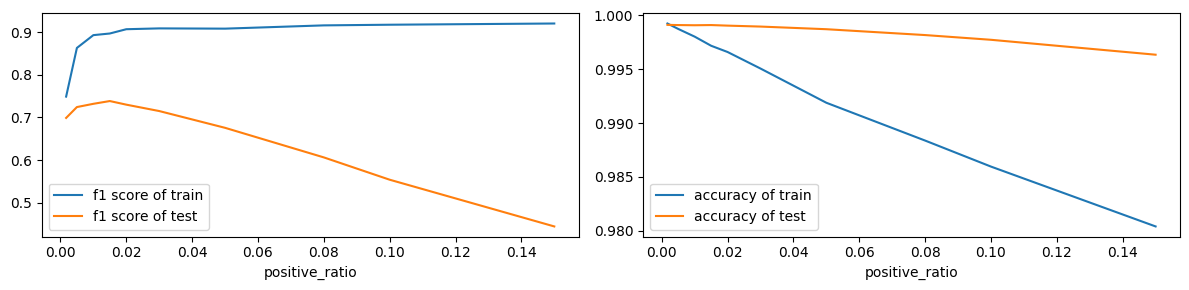

In [44]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(postive_ratio, f1_train_ros, label='f1 score of train')
axes[0].plot(postive_ratio, f1_test_ros, label='f1 score of test')
axes[0].set_xlabel('positive_ratio')
axes[0].legend()

axes[1].plot(postive_ratio, acc_train, label='accuracy of train')
axes[1].plot(postive_ratio, acc_test, label='accuracy of test')
axes[1].set_xlabel('positive_ratio')
axes[1].legend()

plt.tight_layout()
plt.show()

**[Ex.13]**

학습 데이터 df_train에서 대상 변수 Class를 제외한 모든 변수를 입력 변수로 설정합니다. 

Class가 양성(Positive)인 비율을 아래와 같이 변화를 주어 df_train을 Random Under Sampling방법으로 샘플하고 성능의 차이를 살펴 봅니다.

샘플링 데이터로 학습하고, df_test로 성능을 측정합니다.

성능 지표는 f1-score 이고, 학습 모델은 로지스틱 회귀(Logistic Regression)입니다.


```
negative_ratio = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15]
```

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

f1_train_rus, f1_test_rus = list(), list()
acc_train, acc_test = list(), list()
X_cols = [i for i in df_train.columns if i !='Class']

# 표준화 처리기와 로지스틱 회귀모델을 결합합니다.
clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
clf_lr.fit(df_train[X_cols], df_train['Class'])

# 언더샘플링하지 않았을 경우의 성능을 기록합니다.
prd = clf_lr.predict(df_train[X_cols])
f1_train_rus.append(f1_score(df_train['Class'], prd))
acc_train.append(accuracy_score(df_train['Class'], prd))
prd = clf_lr.predict(df_test[X_cols])
f1_test_rus.append(f1_score(df_test['Class'], prd))
acc_test.append(accuracy_score(df_test['Class'], prd))

# 설정에 따른 성능을 측정하여 기록합니다.
negative_ratio = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15]
for i in negative_ratio:
    rus = RandomUnderSampler(sampling_strategy=i, random_state=123)
    X_rus, y_rus = rus.fit_resample(df_train[X_cols], df_train['Class'])
    clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
    clf_lr.fit(X_rus, y_rus)
    prd = clf_lr.predict(X_rus)
    f1_train_rus.append(f1_score(y_rus, prd))
    acc_train.append(accuracy_score(y_rus, prd))
    prd = clf_lr.predict(df_test[X_cols].values)
    f1_test_rus.append(f1_score(df_test['Class'], prd))
    acc_test.append(accuracy_score(df_test['Class'], prd))
negative_ratio =  [df_train['Class'].value_counts(normalize=True).loc[1]] + negative_ratio

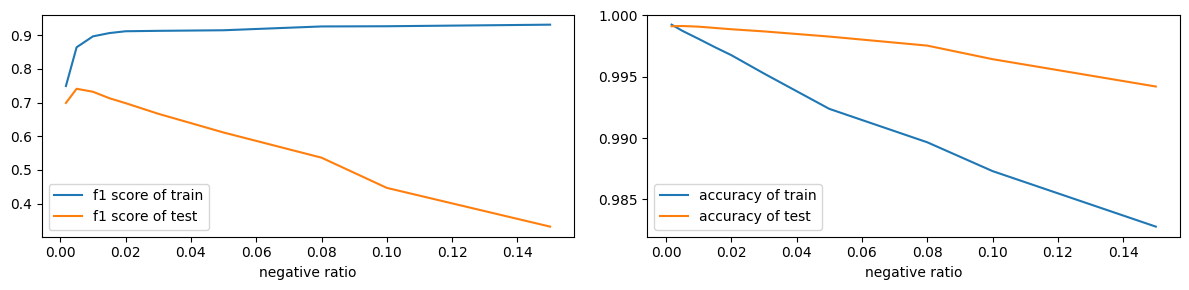

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(negative_ratio, f1_train_rus, label='f1 score of train')
axes[0].plot(negative_ratio, f1_test_rus, label='f1 score of test')
axes[0].set_xlabel('negative ratio')
axes[0].legend()

axes[1].plot(negative_ratio, acc_train, label='accuracy of train')
axes[1].plot(negative_ratio, acc_test, label='accuracy of test')
axes[1].set_xlabel('negative ratio')
axes[1].legend()

plt.tight_layout()
plt.show()

#### Over Sampling 과 Under Sampling 비교

|   | 오버 샘플링<br/>(Over Sampling) | 언더 샘플링<br/>(Under Sampling) |
| --- | --- | --- |
| 장점 | 정보 손실 없음<br/>소수 클래스 표현력 향상 | 계산 속도 증가<br/>학습 데이터가 작아짐 → 빠른 학습 |
| 단점 | 과적합 위험 (특히 단순 복제 시)<br/>연산량 증가 | 정보 손실 가능성<br/>데이터 대표성 손상 가능 |
| 모델에 미치는 영향 | 복잡한 결정 경계 가능<br/>소수 클래스의 결정 경계 확장 | 단순화된 경계 유도 |
| 데이터 분포에 미치는 영향 | 소수 클래스 분포의 인위적 확장<br/>소수 클래스 분포 왜곡 | 다수 클래스 분포 왜곡 |


#### SMOTE(Synthetic Minor Over-Sampling Technique)

- 1. 대상 클래스의 임의 데이터 포인트 x 를 선택
- 2. k 개의 최근접 이웃 중 하나를 선택 – $x_{neighbor}}$
> $𝐱_{𝑠𝑚𝑜𝑡𝑒}=𝐱+𝛿(𝐱_{neighbor}−𝐱)$
>
> $𝛿 \sim 𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,1)$
- 3. x smote 추가, 지정한 수만큼 뽑힐 때까지 1 부터 반복

- SMOTE 결과 분석

|   | 설명 |
| --- | --- |
| 장점 | 데이터 다양성 증가 |
| 단점 | 노이즈 증폭 가능성<br/>고차원 공간에서 효과 감소 |


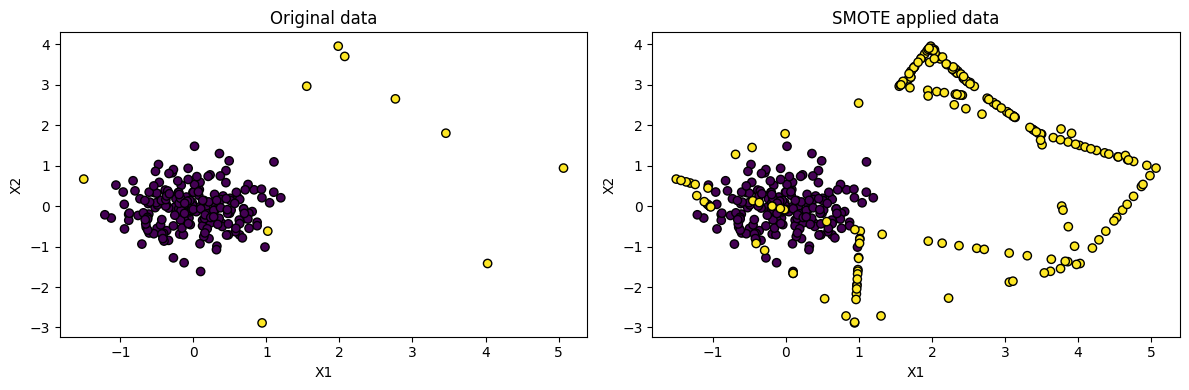

In [47]:
from sklearn.datasets import make_blobs
from imblearn.over_sampling import SMOTE

# 2차원 데이터 샘플 생성
X, y = make_blobs(n_samples=[200, 10], centers=[[0, 0], [2, 2]], cluster_std=[0.5, 2], random_state=123)
# SMOTE 적용
smote = SMOTE(sampling_strategy='not majority', k_neighbors=3, random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 원본 데이터 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for X_, y_, ax, title in zip([X, X_resampled], [y, y_resampled], axes, ['Original data', 'SMOTE applied data']):
    ax.scatter(X_[:, 0], X_[:, 1], c=y_, marker='o', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

#### ADASYN(Adaptive Synthetic Sampling Approach)

- 주변의 다수 클래스에 맞춰 샘플링 수를 조정
1. 각 대상 클래스 샘플별 샘플링 개수 할당

> $𝑔_{i}=\frac{𝑟_𝑖}\sum_𝑗𝑟_𝑗 𝐺$
>
> {𝑟_i}:{𝐱_𝐢} 주변 k 개의 이웃 중 다수 클래스의 비율
> 
> $𝐆$: 전체 생성할 샘플 수

2. 각 데이터 포인트 – x i 에 대해 gi 만큼 아래 과정 반복

> k 개의 최근접 이웃 중 하나를 선택 – x_{neighbor}
> 
> $𝐱_{adasyn}=𝐱+\delta(𝐱_{neighbor}−𝐱)$
>
> $𝛿~𝑈𝑛𝑖𝑓𝑜𝑟𝑚(0,1)$
> 
> x_{adasyn} 추가

- 장점: 분류가 어려운 지점에 소수 클래스 집중
- 단점
> 노이즈 샘플을 더 많이 합성시킬 수 있음
> 
> 고차원 공간에서 효과 감소

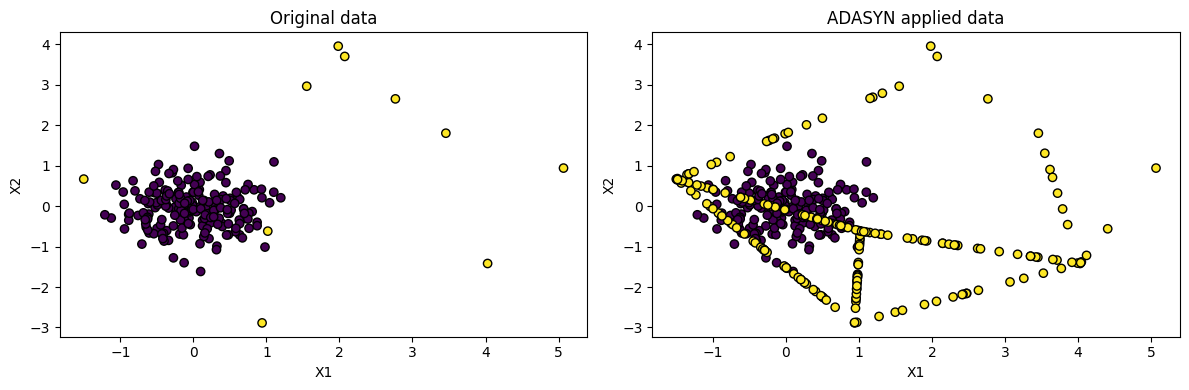

In [48]:
from sklearn.datasets import make_blobs
from imblearn.over_sampling import ADASYN

# 2차원 데이터 샘플 생성
X, y = make_blobs(n_samples=[200, 10], centers=[[0, 0], [2, 2]], cluster_std=[0.5, 2], random_state=123)
# SMOTE 적용
smote = ADASYN(sampling_strategy='not majority', n_neighbors=3, random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 원본 데이터 시각화
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

for X_, y_, ax, title in zip([X, X_resampled], [y, y_resampled], axes, ['Original data', 'ADASYN applied data']):
    ax.scatter(X_[:, 0], X_[:, 1], c=y_, marker='o', edgecolors='k')
    ax.set_title(title)
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

**[Ex.14]**

학습 데이터 df_train에서 대상 변수 Class를 제외한 모든 변수를 입력 변수로 설정합니다. 

Class가 양성(Positive)인 비율을 아래와 같이 변화를 주어 df_train을 ADASYN 알고리즘으로 

Over Sampling하고 성능의 차이를 살펴 봅니다.

Over Sampling한 데이터로 학습을하고, df_test로 성능을 측정합니다.

성능 지표는 f1-score 이고, 학습 모델은 로지스틱 회귀(Logistic Regression)입니다.


```
postive_ratio = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15]
```

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, accuracy_score

f1_train_adasyn, f1_test_adasyn = list(), list()
acc_train, acc_test = list(), list()
X_cols = [i for i in df_train.columns if i !='Class']
clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
clf_lr.fit(df_train[X_cols], df_train['Class'])

prd = clf_lr.predict(df_train[X_cols])
f1_train_adasyn.append(f1_score(df_train['Class'], prd))
acc_train.append(accuracy_score(df_train['Class'], prd))
prd = clf_lr.predict(df_test[X_cols])
f1_test_adasyn.append(f1_score(df_test['Class'], prd))
acc_test.append(accuracy_score(df_test['Class'], prd))
postive_ratio = [0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.08, 0.1, 0.15]
for i in postive_ratio:
    ros = ADASYN(sampling_strategy=i)
    X_ros, y_ros = ros.fit_resample(df_train[X_cols], df_train['Class'])
    clf_lr = make_pipeline(StandardScaler(), LogisticRegression(solver='lbfgs'))
    clf_lr.fit(X_ros, y_ros)
    prd = clf_lr.predict(X_ros)
    f1_train_adasyn.append(f1_score(y_ros, prd))
    acc_train.append(accuracy_score(y_ros, prd))
    prd = clf_lr.predict(df_test[X_cols].values)
    f1_test_adasyn.append(f1_score(df_test['Class'], prd))
    acc_test.append(accuracy_score(df_test['Class'], prd))
postive_ratio = [df_train['Class'].value_counts(normalize=True).loc[1]] + postive_ratio

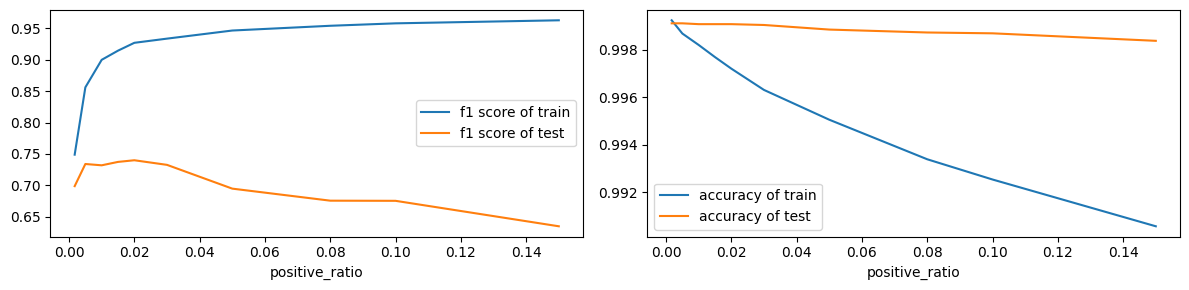

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
axes[0].plot(postive_ratio, f1_train_adasyn, label='f1 score of train')
axes[0].plot(postive_ratio, f1_test_adasyn, label='f1 score of test')
axes[0].set_xlabel('positive_ratio')
axes[0].legend()

axes[1].plot(postive_ratio, acc_train, label='accuracy of train')
axes[1].plot(postive_ratio, acc_test, label='accuracy of test')
axes[1].set_xlabel('positive_ratio')
axes[1].legend()

plt.tight_layout()
plt.show()

#### Under Sampling
- Tomek’s Link 알고리즘
> 서로 다른 클래스에 속해 있으면서, 서로가 서로의 최근접 이웃인 경우
> 
> → 클래스 분류에 혼동을 일으킬 가능성이 높음
> 
> → Under Sampling 대상이 되는 클래스의 데이터 포인트 제외
>
> 장점: 경계선 정제
> 
> 단점: 데이터 손실, 고차원 공간에서 효과 감소

**[Ex.15]**

Tomek's Link 방법을 확인해 보고자, 3개 클래스를 지닌 클래스 불균형 문제를 지닌 2차원 데이터셋을 만듭니다. 

Tomek's Link를 직접 구해 보고, 결과를 시각화해 봅니다.

In [51]:
from sklearn.datasets import make_blobs

# 2차원 데이터 샘플 생성
X, y = make_blobs(
    n_samples=[150, 50, 30], 
    centers=[[-0.5, 0], [2, 2], [1.5, -1]], 
    cluster_std=[0.5, 1.0, 0.7], random_state=123
)

df_tomek = pd.DataFrame(X, columns=['X1', 'X2']).assign(y = y.astype('str'))

In [52]:
from scipy.spatial.distance import pdist,squareform
X_cols = ['X1', 'X2']
majority_class = df_tomek['y'].value_counts().idxmax()
# 최근접점을 구하기 위해 데이터 포인트간 거리를 구합니다.
df_dist = pd.DataFrame(
    squareform(pdist(df_tomek[X_cols])), 
    index = df_tomek.index, 
    columns = df_tomek.index
)
# 데이터 포인트에서 자기자신을 제외한 최근접점의 인덱스를 구합니다.
s_idx_nearest = df_dist.apply(lambda x: x.loc[x.index != x.name].idxmin(), axis=1)
tomek_links_index = s_idx_nearest.loc[
    (df_tomek['y'] == majority_class) & # 다수 클래스 인지 확인
    (df_tomek['y'] != s_idx_nearest.map(df_tomek['y'])) & # 서로가 다른 클래스인지 확인
    s_idx_nearest.map(s_idx_nearest).pipe(lambda x: x.index == x) # 서로가 최근접점인지 확인
].index.values
tomek_links_index

array([  1,   4, 104, 186, 194], dtype=int64)

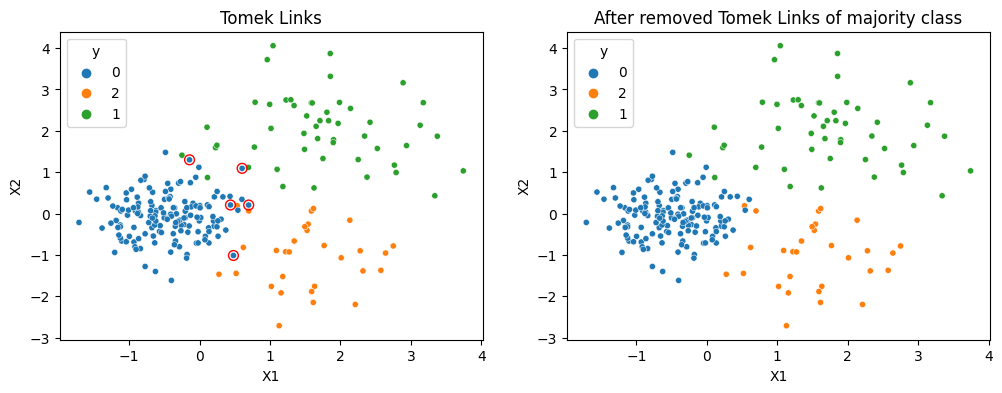

In [53]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.scatterplot(data=df_tomek, x='X1', y='X2', hue='y', s=20, ax=axes[0])
axes[0].set_title('Tomek Links')
axes[0].set_xlabel('X1')
axes[0].set_ylabel('X2')

axes[0].scatter(
    x = df_tomek.loc[tomek_links_index, 'X1'],
    y = df_tomek.loc[tomek_links_index, 'X2'],
    s = 50, color='r', facecolors='none'
)
    
sns.scatterplot(
    data=df_tomek.loc[~df_tomek.index.isin(tomek_links_index)], 
    x='X1', y='X2', hue='y', s=20, ax=axes[1]
)
axes[1].set_title('After removed Tomek Links of majority class')
axes[1].set_xlabel('X1')
axes[1].set_ylabel('X2')
plt.show()